In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load & preprocess dataset
# ------------------------------
df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:

#preprocessing
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

# Encode Gender
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])

# One-hot encode Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Features & target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




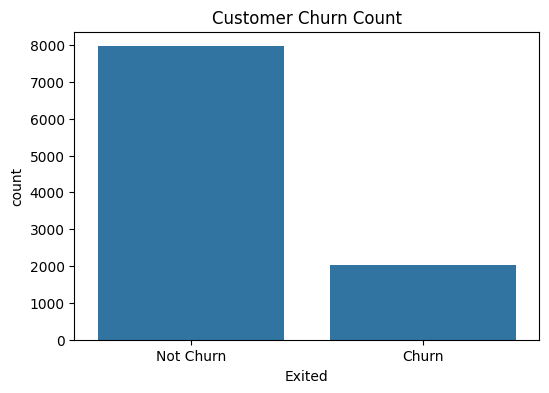

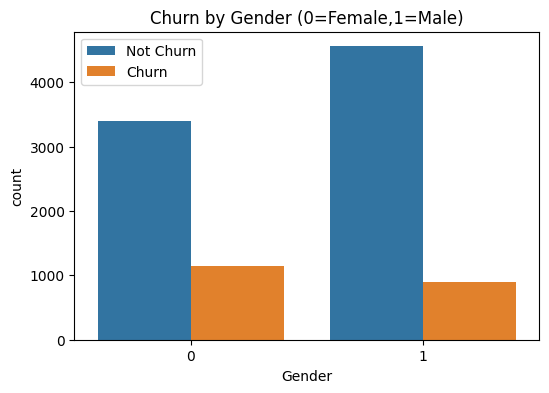

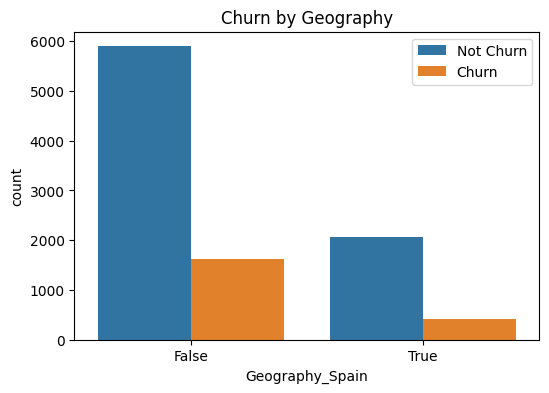

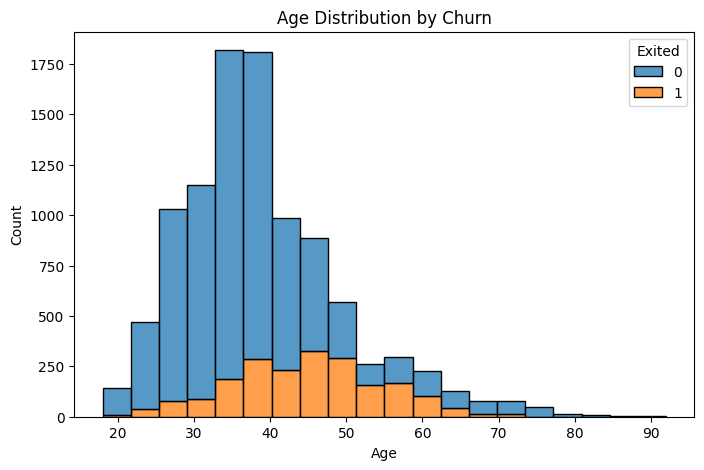

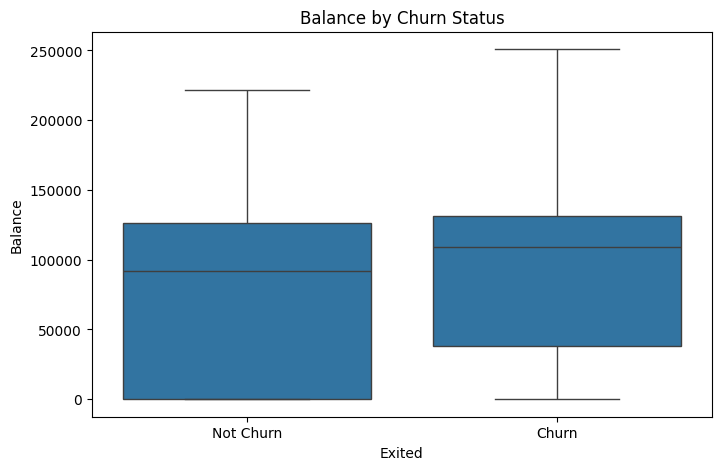

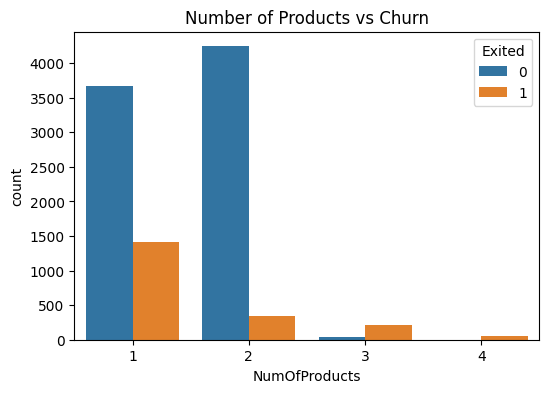

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# -------------------------
# 1. Load dataset
# -------------------------
df = pd.read_csv("Churn_Modelling.csv")

# Drop unnecessary columns
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

# Encode Gender to numeric
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])

# One-hot encode Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# -------------------------
# 2. Churn count plot
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Count')
plt.xticks([0,1], ['Not Churn', 'Churn'])
plt.show()

# -------------------------
# 3. Churn by Gender
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender (0=Female,1=Male)')
plt.legend(['Not Churn','Churn'])
plt.show()

# -------------------------
# 4. Churn by Geography
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Geography_Spain', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.legend(['Not Churn','Churn'])
plt.show()

# -------------------------
# 5. Age distribution by churn
# -------------------------
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=20)
plt.title('Age Distribution by Churn')
plt.show()

# -------------------------
# 6. Balance vs Exited
# -------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance by Churn Status')
plt.xticks([0,1], ['Not Churn','Churn'])
plt.show()

# -------------------------
# 7. NumOfProducts vs Exited
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Number of Products vs Churn')
plt.show()




In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 2. Train models
# ----------------------------
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


Logistic Regression Accuracy: 0.808





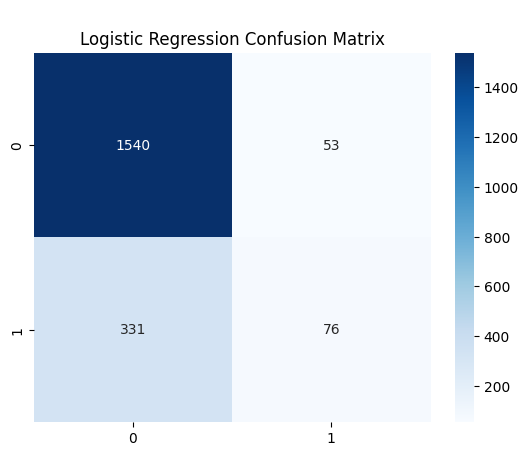

In [6]:
# ----------------------------
# 3. Print accuracy
# ----------------------------
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# ----------------------------
# Logistic Regression Heatmap
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("\nLogistic Regression Confusion Matrix")
print("\n\n")
plt.show()



Random Forest Accuracy: 0.861





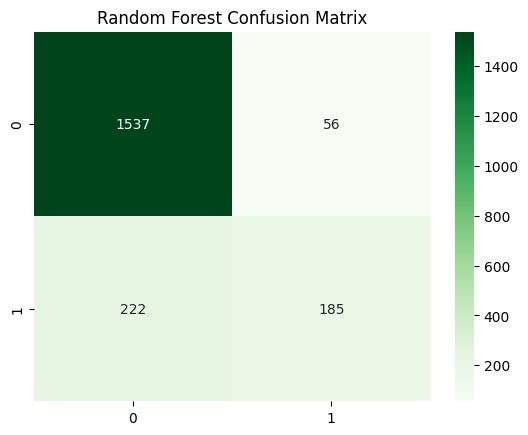

In [8]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n\n")
# Random Forest Heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()



Gradient Boosting Accuracy: 0.87





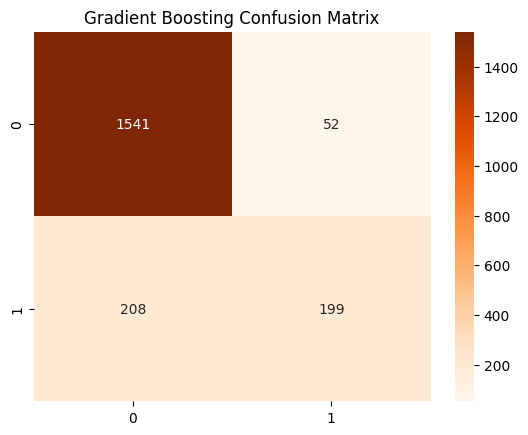

In [9]:
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\n\n")
# Gradient Boosting Heatmap
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


In [12]:
# 5. Predict on new customer
# ----------------------------
new_customer = pd.DataFrame({
    'CreditScore': [650],
    'Gender': ['Female'],
    'Age': [42],
    'Tenure': [5],
    'Balance': [50000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [60000],
    'Geography': ['Germany']
})

# Encode Gender using SAME encoder
new_customer['Gender'] = gender_encoder.transform(new_customer['Gender'])

# One-hot encode Geography
new_customer = pd.get_dummies(new_customer, columns=['Geography'], drop_first=True)

# Ensure same columns as training
for col in ['Geography_Germany', 'Geography_Spain']:
    if col not in new_customer.columns:
        new_customer[col] = 0

# Reorder columns to match training X
new_customer = new_customer[X.columns]

# Scale using SAME scaler
new_customer_scaled = scaler.transform(new_customer)

# Predictions
pred_log = log_model.predict(new_customer_scaled)
pred_rf = rf_model.predict(new_customer_scaled)
pred_gb = gb_model.predict(new_customer_scaled)
print("\nPredictions for new customer:")
print("1.Logistic Regression:", "Churn" if pred_log[0]==1 else "Not Churn")
print("2.Random Forest:", "Churn" if pred_rf[0]==1 else "Not Churn")
print("3.Gradient Boosting:", "Churn" if pred_gb[0]==1 else "Not Churn")



Predictions for new customer:
1.Logistic Regression: Not Churn
2.Random Forest: Not Churn
3.Gradient Boosting: Not Churn
